# Úkol č. 2 - předzpracování dat a binární klasifikace (do 9. listopadu 23:59)

  * V rámci tohoto úkolu se musíte vypořádat s příznaky, které jsou různých typů.
  * Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru **data.csv** a data na vyhodnocení v souboru **evaluation.csv**.

#### Seznam příznaků:
* survived - zda přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * V Jupyter notebooku načtěte data ze souboru **data.csv**. Vhodným způsobem si je rozdělte na podmnožiny vhodné k trénování modelu.
  * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
  * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména. Některé příznaky můžete také úplně zahodit.
  * Nějakým způsobem se vypořádejte s chybějícími hodnotami.
  * Následně si vyberte vhodný klasifikační model z přednášek. Najděte vhodné hyperparametry a určete jeho přesnost (accuracy) na trénovací množině. Také určete jeho přesnost na testovací množině.
  * Načtěte vyhodnocovací data ze souboru **evaluation.csv**. Napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte **results.csv** soubor, ve kterém tyto predikce uložíte do dvou sloupců: ID, predikce přežití. Tento soubor nahrajte do repozitáře.
  * Ukázka prvních řádků souboru *results.csv*:
  
```
ID,survived
1000,0
1001,1
...
```

**Další body zadání** za případné další body  (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +4 body) Aplikujte všechny klasifikační modely z přednášek a určete (na základě přesnosti na validační množině), který je nejlepší. Přesnost tohoto nejlepšího modelu odhadněte pomocí křížové validace. K predikcím na vyhodnocovacích datech využijte tento model.
  * (až +4 body) Zkuste použít nějaké (alespoň dvě) netriviální metody doplňování chybějících hodnot u věku. Zaměřte na vliv těchto metod na přesnost predikce výsledného modelu. K predikcím na vyhodnocovacích datech využijte ten přístup, který Vám vyjde jako nejlepší.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor s predikcemi pro vyhodnocovací data (`results.csv`).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni**

In [249]:
### odtud už je to Vaše
import pandas as pd
df = pd.read_csv('data.csv')

df.head(10)

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL"
1,1,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S,NaN
2,2,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,NaN
3,3,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S,NaN
4,4,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,NaN
5,5,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S,"New York, NY"
6,6,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q,NaN
7,7,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S,"London / East Orange, NJ"
8,8,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,"St Ives, Cornwall / Calumet, MI"
9,9,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C,"Russia New York, NY"


In [2]:
df.isnull().sum()


ID             0
survived       0
pclass         0
name           0
sex            0
age          203
sibsp          0
parch          0
ticket         0
fare           0
cabin        774
embarked       2
home.dest    446
dtype: int64

In [250]:
#odstranime home.dest a embarked protoze na tom nezáleží výsledek
df = df[['ID','survived' ,'pclass' ,'name' ,'sex' ,'age' ,'sibsp' ,'parch' ,'ticket' ,'fare' ,'cabin']]
df

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin
0,0,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN
1,1,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN
2,2,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN
3,3,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN
4,4,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN
996,996,1,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.0500,NaN
997,997,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN
998,998,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN


In [251]:
money_res = {}
money = df['pclass'].drop_duplicates()
for i in range(0,len(money)):
    res_all = df[['fare', 'pclass']].where(df['pclass'] == money.iloc[i]).dropna()
    res_all = res_all['fare']
    money_res[i] = res_all.sum()/len(res_all)
money_res

{0: 13.355482395644282, 1: 21.4526780952381, 2: 89.86002468619246}

In [5]:
import numpy as np
for i in range(0,len(df)):
    if np.isnan(df.loc[i,'fare']):
        df.loc[i,'fare'] = money_res[df.loc[i,'pclass']]
df

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin
0,0,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN
1,1,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN
2,2,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN
3,3,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN
4,4,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN
996,996,1,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.0500,NaN
997,997,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN
998,998,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN


In [6]:
df.isnull().sum()

ID            0
survived      0
pclass        0
name          0
sex           0
age         203
sibsp         0
parch         0
ticket        0
fare          0
cabin       774
dtype: int64

In [252]:
kek = df.cabin.drop_duplicates().dropna()
cabin_arr = []
for i in range(0,len(kek)):
    pop = kek.iloc[i]
    cabin_arr.append(pop[0])
#set(cabin_arr)
pocet = 1
cabin_arr_res={}
for i in set(cabin_arr):
    cabin_arr_res[i]=pocet
    pocet+=1
cabin_arr_res

{'A': 1, 'C': 2, 'B': 3, 'G': 4, 'E': 5, 'F': 6, 'D': 7}

In [253]:
import numpy as np
for i in range(0, len(df)):
    print(df.loc[i,'cabin'])
    if type(df.loc[i,'cabin'])==str or type(df.loc[i,'cabin'])==int:
        pop = str(df.loc[i,'cabin'])
        if pop[0]!='0':
            df.loc[i,'cabin'] = cabin_arr_res[pop[0]]
    elif np.isnan(df.loc[i,'cabin']):
        df.loc[i,'cabin'] = 0

        

nan
nan
nan
nan
nan
E67
nan
C126
nan
nan
nan
nan
nan
nan
D37
nan
nan
nan
nan
nan
B79
nan
nan
nan
nan
nan
nan
nan
nan
nan
B73
nan
nan
D19
nan
nan
nan
C85
nan
nan
nan
nan
nan
nan
nan
nan
nan
E31
C92
nan
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
B78
nan
C80
nan
nan
nan
nan
nan
D28
nan
nan
nan
nan
nan
nan
nan
nan
nan
E49
C116
nan
nan
B41
E40
nan
nan
C22 C26
nan
nan
nan
nan
D26
D49
nan
nan
nan
nan
C83
nan
nan
nan
C95
nan
B10
nan
F G73
C101
E67
C45
nan
nan
nan
nan
nan
C22 C26
nan
nan
nan
nan
nan
nan
nan
nan
C130
nan
nan
B5
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C80
nan
nan
nan
F G73
nan
nan
nan
nan
C7
nan
nan
D38
nan
nan
nan
nan
nan
nan
D17
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D46
A34
nan
nan
F4
nan
nan
nan
nan
nan
nan
nan
nan
nan
D20
nan
nan
nan
B57 B59 B63 B66
nan
nan
nan
nan
nan
nan
nan
A9
nan
nan
E12
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E17
A23
nan
nan
B28
nan
nan
nan
nan
B96 B98
nan
nan
C92
D19
B22
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
B41
nan
nan
n

In [254]:
df.cabin.drop_duplicates()

0      0
5      5
7      2
14     7
20     3
58     6
170    1
566    4
Name: cabin, dtype: object

In [255]:

age_1 = df['age'][df['pclass']==1].mean()
age_2 = df['age'][df['pclass']==2].mean()
age_3 = df['age'][df['pclass']==3].mean()
age_all = [age_1, age_2, age_3]
print(age_all)

[38.898669953051645, 28.58125, 24.43836796875]


In [256]:
for i in range(0, len(df)):
    if np.isnan(df.loc[i,'age']):
        df.loc[i,'age'] = age_all[df.loc[i,'pclass']-1]

In [257]:
df.isnull().sum()

ID          0
survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
dtype: int64

In [258]:
df = df.drop(columns=['name', 'ticket'])


In [259]:
df

,ID,survived,pclass,sex,age,sibsp,parch,fare,cabin
0,0,1,3,male,19.000000,0,0,8.0500,0
1,1,1,2,female,40.000000,0,0,13.0000,0
2,2,0,3,female,18.000000,0,0,6.7500,0
3,3,0,3,male,24.438368,1,9,69.5500,0
4,4,0,3,female,30.000000,0,0,8.6625,0
...,...,...,...,...,...,...,...,...,...
995,995,0,3,male,24.438368,0,0,7.8958,0
996,996,1,3,male,24.438368,0,0,7.0500,0
997,997,0,3,female,28.000000,1,1,14.4000,0
998,998,0,3,male,40.000000,0,0,7.8958,0


In [260]:
for i in range(0, len(df)):
    if df.loc[i,'sex'] == 'male':
        df.loc[i,'sex'] = 0
    else:
        df.loc[i,'sex'] = 1

In [261]:
df

,ID,survived,pclass,sex,age,sibsp,parch,fare,cabin
0,0,1,3,0,19.000000,0,0,8.0500,0
1,1,1,2,1,40.000000,0,0,13.0000,0
2,2,0,3,1,18.000000,0,0,6.7500,0
3,3,0,3,0,24.438368,1,9,69.5500,0
4,4,0,3,1,30.000000,0,0,8.6625,0
...,...,...,...,...,...,...,...,...,...
995,995,0,3,0,24.438368,0,0,7.8958,0
996,996,1,3,0,24.438368,0,0,7.0500,0
997,997,0,3,1,28.000000,1,1,14.4000,0
998,998,0,3,0,40.000000,0,0,7.8958,0


In [262]:
xdata = df.drop(columns=['survived'])
xdata

,ID,pclass,sex,age,sibsp,parch,fare,cabin
0,0,3,0,19.000000,0,0,8.0500,0
1,1,2,1,40.000000,0,0,13.0000,0
2,2,3,1,18.000000,0,0,6.7500,0
3,3,3,0,24.438368,1,9,69.5500,0
4,4,3,1,30.000000,0,0,8.6625,0
...,...,...,...,...,...,...,...,...
995,995,3,0,24.438368,0,0,7.8958,0
996,996,3,0,24.438368,0,0,7.0500,0
997,997,3,1,28.000000,1,1,14.4000,0
998,998,3,0,40.000000,0,0,7.8958,0


In [263]:
ydata = df['survived']
ydata

0      1
1      1
2      0
3      0
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: survived, Length: 1000, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(xdata, ydata, 
                                                    test_size = 0.25,
                                                    random_state = 42)

In [294]:

arr = []

In [295]:
random_forest = RandomForestClassifier(n_estimators=130)
random_forest.fit(X_train, Y_train)
print(random_forest.score(X_test, Y_test))
arr.append(pd.Series({'model':'random_forest','res':random_forest.score(X_test, Y_test)}))

0.804


In [296]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print((logreg.score(X_test, Y_test)))
arr.append(pd.Series({'model':'logreg','res':logreg.score(X_test, Y_test)}))

0.78


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [297]:
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, Y_train)  
print(knn.score(X_test, Y_test))
arr.append(pd.Series({'model':'knn','res':knn.score(X_test, Y_test)}))

0.664


In [298]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
print(gaussian.score(X_test, Y_test))
arr.append(pd.Series({'model':'gaussian','res':gaussian.score(X_test, Y_test)}))

0.764


In [299]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
print(decision_tree.score(X_test, Y_test))
arr.append(pd.Series({'model':'decision_tree','res':decision_tree.score(X_test, Y_test)}))

0.748


In [300]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, Y_train)
print(ada_boost.score(X_test, Y_test))
arr.append(pd.Series({'model':'ada_boost','res':ada_boost.score(X_test, Y_test)}))

0.8


In [292]:
arr


[model    random_forest
 res               0.82
 dtype: object,
 model    logreg
 res        0.78
 dtype: object,
 model         knn
 res      0.706667
 dtype: object,
 model    gaussian
 res         0.748
 dtype: object,
 model    decision_tree
 res                  1
 dtype: object,
 model    ada_boost
 res          0.816
 dtype: object]

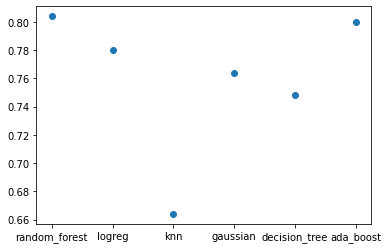

In [301]:
import matplotlib.pyplot as plt 
df_res=pd.DataFrame(arr)
plt.scatter(df_res['model'], df_res['res'])
plt.show()

In [146]:
###jak muzeme videt random_forest je nejlepsi model

In [309]:
df_res

,model,res
0,random_forest,0.804
1,logreg,0.780
2,knn,0.664
3,gaussian,0.764
4,decision_tree,0.748
5,ada_boost,0.800


In [302]:
res = pd.read_csv('evaluation.csv')

In [303]:
res = res[['ID','pclass' ,'name' ,'sex' ,'age' ,'sibsp' ,'parch' ,'ticket' ,'fare' ,'cabin']]
money_res = {}
money = res['pclass'].drop_duplicates()
for i in range(0,len(money)):
    res_all = res[['fare', 'pclass']].where(res['pclass'] == money.iloc[i]).dropna()
    res_all = res_all['fare']
    money_res[i] = res_all.sum()/len(res_all)
for i in range(0,len(res)):
    if np.isnan(res.loc[i,'fare']):
        res.loc[i,'fare'] = money_res[res.loc[i,'pclass']-1]
kek = res.cabin.drop_duplicates().dropna()
cabin_arr = []
for i in range(0,len(kek)):
    pop = str(kek.iloc[i])
    cabin_arr.append(pop[0])
#set(cabin_arr)
cabin_arr=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
pocet = 1
cabin_arr_res={}
for i in cabin_arr:
    cabin_arr_res[i]=pocet
    pocet+=1
for i in range(0, len(res)):

    if type(res.loc[i,'cabin'])==str or type(res.loc[i,'cabin'])==int:
        pop = str(res.loc[i,'cabin'])
    if pop[0]!='0':
            res.loc[i,'cabin'] = cabin_arr_res[pop[0]]
    elif np.isnan(res.loc[i,'cabin']):
        res.loc[i,'cabin'] = 0

age_1 = res['age'][res['pclass']==1].mean()
age_2 = res['age'][res['pclass']==2].mean()
age_3 = res['age'][res['pclass']==3].mean()
age_all = [age_1, age_2, age_3]
for i in range(0, len(res)):
    if np.isnan(res.loc[i,'age']):
        res.loc[i,'age'] = age_all[res.loc[i,'pclass']-1]
res = res.drop(columns=['name', 'ticket'])
for i in range(0, len(res)):
    if res.loc[i,'sex'] == 'male':
        res.loc[i,'sex'] = 0
    else:
        res.loc[i,'sex'] = 1

In [304]:
res.isnull().sum()

ID        0
pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64

In [305]:
res_all = random_forest.predict(res)
res_all

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [306]:
end = pd.DataFrame({'ID':res['ID'], 'survived':res_all})

In [307]:
end

,ID,survived
0,1000,1
1,1001,1
2,1002,0
3,1003,1
4,1004,1
...,...,...
304,1304,1
305,1305,1
306,1306,1
307,1307,1


In [308]:
end.to_csv('result.csv', index = False)

In [276]:
#new
def cross_validation(model, x, y):
    model_t = model
    best = 0.0
    for i in range(0,10):
        model_g = model_t
        X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
        model_g.fit(X_train, y_train)
        tmp = reg.score(X_test, Y_test)
        if  tmp> best:
            best = tmp
            model = model_g
            
    return model, best

In [106]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pandas as pd
df = pd.read_csv('data.csv')
ev = pd.read_csv('evaluation.csv')

In [57]:
df.isnull().sum()


ID             0
survived       0
pclass         0
name           0
sex            0
age          203
sibsp          0
parch          0
ticket         0
fare           0
cabin        774
embarked       2
home.dest    446
dtype: int64

In [85]:
def get_dopl(df):
    res = df[['ID','pclass' ,'name' ,'sex' ,'age' ,'sibsp' ,'parch' ,'ticket' ,'fare' ,'cabin']]

    for i in range(0, len(res)):
        if res.loc[i,'sex'] == 'male':
            res.loc[i,'sex'] = 0
        else:
            res.loc[i,'sex'] = 1
    for i in range(0, len(res)):
        if res.loc[i,'sex'] == 'male':
            res.loc[i,'sex'] = 0
        else:
            res.loc[i,'sex'] = 1
    res['title'] = res.name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
    normalized_titles = {
        "Capt":       0,
        "Col":        0,
        "Major":      0,
        "Dr":         0,
        "Rev":        0,
        "Master" :    1,
        "Jonkheer":   1,
        "Don":        1,
        "Sir" :       1,
        "the Countess" : 1,
        "Dona":       1,
        "Lady" :      1,
        "Mme":        2,
        "Mrs" :       2,
        "Ms":         2,
        "Mlle":       2,
        "Miss" :      2,
        "Mr" :        2
        
    }
    for i in range(0, len(res)):
        res.loc[i,'title'] = normalized_titles[res.loc[i,'title']]
    res = res.drop(columns=['name', 'ticket'])
    return res


In [100]:
def get_cab(res):
    for i in range(0,len(res)):
        if type(res.loc[i,'cabin'])==str:
            st = res.loc[i,'cabin']
            res.loc[i,'cabin'] = st[0]


In [107]:
res=get_dopl(df)
res

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,pclass,sex,age,sibsp,parch,fare,cabin,title
0,0,3,1,19.0,0,0,8.0500,NaN,2
1,1,2,1,40.0,0,0,13.0000,NaN,2
2,2,3,1,18.0,0,0,6.7500,NaN,2
3,3,3,1,NaN,1,9,69.5500,NaN,2
4,4,3,1,30.0,0,0,8.6625,NaN,2
...,...,...,...,...,...,...,...,...,...
995,995,3,1,NaN,0,0,7.8958,NaN,2
996,996,3,1,NaN,0,0,7.0500,NaN,2
997,997,3,1,28.0,1,1,14.4000,NaN,2
998,998,3,1,40.0,0,0,7.8958,NaN,2


In [108]:
floor_mapper = dict( zip(get_cab(res)['cabin'].astype('category'),get_cab(res)['cabin'].astype('category').cat.codes))
floor_mapper

{nan: -1, 'E': 4, 'C': 2, 'D': 3, 'B': 1, 'F': 5, 'A': 0, 'G': 6}

In [111]:
for i in range(0,len(res)):
    if type(res.loc[i,'cabin'])==str:
        st = res.loc[i,'cabin']
        res.loc[i,'cabin'] = floor_mapper[res.loc[i,'cabin']]
res['cabin'].drop_duplicates()

0      NaN
5        4
7        2
14       3
20       1
58       5
170      0
566      6
Name: cabin, dtype: object

In [52]:
res=res.set_index('ID')
res

,pclass,sex,age,sibsp,parch,fare,cabin,title
ID,,,,,,,,
0,3,0,19.0,0,0,8.0500,NaN,2
1,2,1,40.0,0,0,13.0000,NaN,2
2,3,1,18.0,0,0,6.7500,NaN,2
3,3,0,NaN,1,9,69.5500,NaN,2
4,3,1,30.0,0,0,8.6625,NaN,2
...,...,...,...,...,...,...,...,...
995,3,0,NaN,0,0,7.8958,NaN,2
996,3,0,NaN,0,0,7.0500,NaN,2
997,3,1,28.0,1,1,14.4000,NaN,2


In [54]:
res.isnull().sum()

pclass      0
sex         0
age       203
sibsp       0
parch       0
fare        0
cabin     774
title       0
dtype: int64

In [112]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [160]:
cabins = [0,1,2,3,4,5,6]

In [161]:
def assign_cabin(row):
    if not isinstance(row['cabin'], int):
        data = None
        #print(int(math.cabin(reg.predict([[row['fare'],row['pclass']]]))))
        try:
            data = int(math.floor(reg.predict([[row['fare'],row['pclass']]])[0]))
            print(2)
            if data<0:
                data = 0
            elif data >len(cabins):
                data = len(cabins)-1
            row['cabin'] = cabins[data]
        except BaseException:
            row['cabin'] = np.NaN
    return row

In [203]:
tmp = res
tmp = tmp[tmp.cabin.notnull()]
tmp = tmp[['fare','pclass', 'cabin']]
X = tmp.drop(columns='cabin').values
y = tmp['cabin'].values
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size = 0.25)

In [204]:
reg.fit(X_train, y_train)
print(reg.score(X_test, Y_test))


0.8324575850491436


In [205]:
res.isnull().sum()

ID          0
pclass      0
sex         0
age       203
sibsp       0
parch       0
fare        0
cabin       0
title       0
dtype: int64

In [220]:
def assign_age(row):
    #print(row)
    if np.isnan(row['age']):
        data = None
        #print(int(math.floor(reg.predict([[row['title'],row['sibsp'],row['parch']]])[0])))
        try:
            #'title','sibsp', 'parch'
            data = int(math.floor(reg_age.predict([[row['title'],row['sibsp'],row['parch']]])[0]))
            #print(2)
            if data<0:
                data = 0
            row['age'] = data
        except BaseException:
            row['age'] = np.NaN
    return row

In [207]:
import math
res = res.apply(lambda row: assign_cabin(row), axis=1)
res

,ID,pclass,sex,age,sibsp,parch,fare,cabin,title
0,0.0,3.0,1.0,19.0,0.0,0.0,8.0500,4.0,2.0
1,1.0,2.0,1.0,40.0,0.0,0.0,13.0000,3.0,2.0
2,2.0,3.0,1.0,18.0,0.0,0.0,6.7500,4.0,2.0
3,3.0,3.0,1.0,NaN,1.0,9.0,69.5500,4.0,2.0
4,4.0,3.0,1.0,30.0,0.0,0.0,8.6625,4.0,2.0
...,...,...,...,...,...,...,...,...,...
995,995.0,3.0,1.0,NaN,0.0,0.0,7.8958,4.0,2.0
996,996.0,3.0,1.0,NaN,0.0,0.0,7.0500,4.0,2.0
997,997.0,3.0,1.0,28.0,1.0,1.0,14.4000,4.0,2.0
998,998.0,3.0,1.0,40.0,0.0,0.0,7.8958,4.0,2.0


In [211]:
#age


reg_age = LinearRegression()

tmp = res
tmp = tmp[tmp.age.notnull()]
tmp = tmp[['title','sibsp', 'parch','age']]
X = tmp.drop(columns='age').values
y = tmp['age'].values
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size = 0.25)
reg_age.fit(X_train, y_train)
print(reg_age.score(X_test, Y_test))


0.02029809686770856


In [221]:

data = res.apply(lambda row: assign_age(row), axis=1)

data.isnull().sum()


ID        0
pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
title     0
dtype: int64

In [239]:
xdata = res
ydata = df['survived']

In [240]:
X_train, X_test, Y_train, Y_test = train_test_split(xdata, ydata, 
                                                    test_size = 0.25,
                                                    random_state = 42)

In [241]:
arr = []

In [281]:
random_forest = RandomForestClassifier(n_estimators=130)
random_forest.fit(X_train, Y_train)
print(random_forest.score(X_test, Y_test))
arr.append(pd.Series({'model':'random_forest','res':random_forest.score(X_test, Y_test)}))

0.72


In [243]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print((logreg.score(X_test, Y_test)))
arr.append(pd.Series({'model':'logreg','res':logreg.score(X_test, Y_test)}))

0.708


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [244]:
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, Y_train)  
print(knn.score(X_test, Y_test))
arr.append(pd.Series({'model':'knn','res':knn.score(X_test, Y_test)}))

0.704


In [245]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
print(gaussian.score(X_test, Y_test))
arr.append(pd.Series({'model':'gaussian','res':gaussian.score(X_test, Y_test)}))

0.696


In [246]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
print(decision_tree.score(X_test, Y_test))
arr.append(pd.Series({'model':'decision_tree','res':decision_tree.score(X_test, Y_test)}))

0.736


In [247]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, Y_train)
print(ada_boost.score(X_test, Y_test))
arr.append(pd.Series({'model':'ada_boost','res':ada_boost.score(X_test, Y_test)}))

0.772


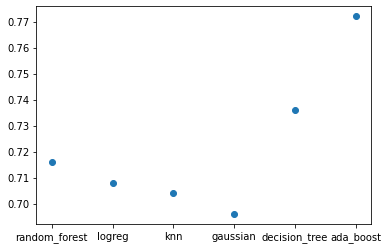

In [248]:
import matplotlib.pyplot as plt 
df_res=pd.DataFrame(arr)
plt.scatter(df_res['model'], df_res['res'])
plt.show()

In [249]:
df_res

,model,res
0,random_forest,0.716
1,logreg,0.708
2,knn,0.704
3,gaussian,0.696
4,decision_tree,0.736
5,ada_boost,0.772


In [255]:
ev = pd.read_csv('evaluation.csv')

In [256]:
ev = get_dopl(ev)


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [257]:
ev.isnull().sum()

ID          0
pclass      0
sex         0
age        60
sibsp       0
parch       0
fare        1
cabin     240
title       0
dtype: int64

In [259]:
money_res = {}
money = ev['pclass'].drop_duplicates()
for i in range(0,len(money)):
    res_all = ev[['fare', 'pclass']].where(ev['pclass'] == money.iloc[i]).dropna()
    res_all = res_all['fare']
    money_res[i] = res_all.sum()/len(res_all)
for i in range(0,len(ev)):
    if np.isnan(ev.loc[i,'fare']):
        ev.loc[i,'fare'] = money_res[ev.loc[i,'pclass']-1]
ev

,ID,pclass,sex,age,sibsp,parch,fare,cabin,title
0,1000,2,1,24.0,2,1,27.0000,NaN,2
1,1001,2,1,25.0,1,1,30.0000,NaN,2
2,1002,2,1,38.0,1,0,21.0000,NaN,2
3,1003,3,1,19.0,1,0,16.1000,NaN,2
4,1004,2,1,60.0,1,0,26.0000,NaN,2
...,...,...,...,...,...,...,...,...,...
304,1304,3,1,18.5,0,0,7.2833,NaN,2
305,1305,3,1,32.0,0,0,56.4958,NaN,2
306,1306,3,1,22.5,0,0,7.2250,NaN,2
307,1307,1,1,45.0,1,1,164.8667,NaN,2


In [260]:
ev = ev.apply(lambda row: assign_cabin(row), axis=1)
ev = ev.apply(lambda row: assign_age(row), axis=1)

In [266]:
ev_1=ev['ID']

In [269]:
ev=ev.set_index('ID')

,pclass,sex,age,sibsp,parch,fare,cabin,title
ID,,,,,,,,
1000.0,2.0,1.0,24.0,2.0,1.0,27.0000,3.0,2.0
1001.0,2.0,1.0,25.0,1.0,1.0,30.0000,3.0,2.0
1002.0,2.0,1.0,38.0,1.0,0.0,21.0000,3.0,2.0
1003.0,3.0,1.0,19.0,1.0,0.0,16.1000,4.0,2.0
1004.0,2.0,1.0,60.0,1.0,0.0,26.0000,3.0,2.0
...,...,...,...,...,...,...,...,...
1304.0,3.0,1.0,18.5,0.0,0.0,7.2833,4.0,2.0
1305.0,3.0,1.0,32.0,0.0,0.0,56.4958,4.0,2.0
1306.0,3.0,1.0,22.5,0.0,0.0,7.2250,4.0,2.0


In [283]:
res_all = ada_boost.predict(ev)
end = pd.DataFrame({'ID':ev_1, 'survived':res_all})
end.to_csv('result.csv', index = False)

In [284]:
end

,ID,survived
0,1000.0,1
1,1001.0,1
2,1002.0,0
3,1003.0,0
4,1004.0,0
...,...,...
304,1304.0,0
305,1305.0,1
306,1306.0,0
307,1307.0,1
